## GRIP - THE SPARKS FOUNDATION


### Data Science And Business Analytics Task 1 - Prediction Using Supervised ML




**Author : Aayush Kumar Jagri**

### Importing The Required Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
warnings.simplefilter("ignore")
%matplotlib inline

C:\Users\Aayush jagri\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

## Import Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

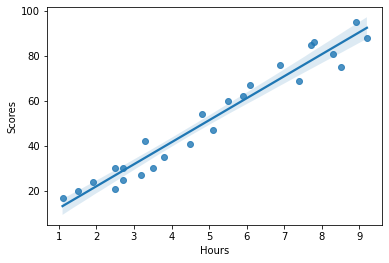

In [7]:
# visualize the relationship between the features and the response using scatterplots
sns.regplot(x = 'Hours', y = 'Scores', data = df)

**Looking at the graph we can say that, as study hours increase scores increases too. So,
there is positive correlation between this two variable. Hence we can proceed with Linear Model**

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Correlation between two variables is positive and quite high**

## Preparing X and y using pandas

* Scikit learn expect X(feature matrix) and y(response vector) to be NumPay arrays.
* However pandas is built on top on NumPay.
* Thus X can be a pandas DataFrame and y can be a pandas series!

In [9]:
#select X(feature metrix) from DataFrame
X = df['Hours'].to_frame()

#select series y(response vector) from DataFrame
y = df['Scores']

#type and shape of X
print(f'Type of X {type(X)} & shape {X.shape}')

#type and shape of y response vector
print(f'Type of y {type(y)} & shape of {y.shape}')

Type of X <class 'pandas.core.frame.DataFrame'> & shape (25, 1)
Type of y <class 'pandas.core.series.Series'> & shape of (25,)


In [10]:
#Splitting X and y into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.80, random_state = 0)

## Baseline

In [11]:
#calculating mean absolute error for y_pred_baseline as compared to y
y_mean = y.mean()
y_pred_baseline = [y_mean]*len(y)
mae_baseline = mean_absolute_error(y, y_pred_baseline)
print('Mean score:', y_mean)
print('Baseline MAE:', round(mae_baseline, 2))

Mean score: 51.48
Baseline MAE: 22.42


In [12]:
#instantiat model
model = LinearRegression()

#fit the model to the training data (learn the coefficent)
model.fit(X_train, y_train)

LinearRegression()

##  Interpreting model coefficents


In [13]:
print('Intercept:', round(model.intercept_, 2))
print('Coefficents:', (model.coef_)[0].round(2))

Intercept: 2.02
Coefficents: 9.91


**y = -1.54 +  10.4611 * Hours**

In [14]:
# Making Prediction on the testing set
y_pred = model.predict(X_test)

##  Model Evaluation

In [15]:
mean_absolute_error(y_test, y_pred)

4.183859899002975

In [16]:
df_pred_test = pd.DataFrame(
    {
        'Predicted Marks': model.predict(X_test),
        'Actual Marks': y_test,
        'Hours': X_test.Hours
       
    }
)
df_pred_test

,Predicted Marks,Actual Marks,Hours
5,16.884145,20,1.5
2,33.732261,27,3.2
19,75.357018,69,7.4
16,26.794801,30,2.5
11,60.491033,62,5.9


In [17]:
import plotly.io as pio
pio.renderers.default = "svg"

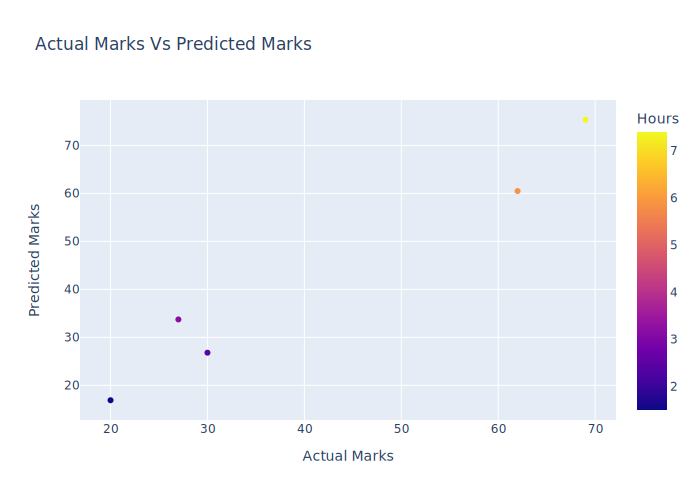

In [18]:
fig = px.scatter(df_pred_test, x ='Actual Marks', 
           y = 'Predicted Marks',color='Hours', 
           title = 'Actual Marks Vs Predicted Marks' )
fig.show(engine="kaleido")

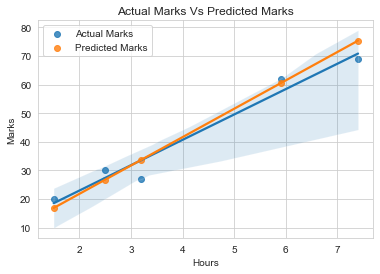

In [19]:
sns.set_style('whitegrid')
sns.regplot(x ='Hours', y = 'Actual Marks', data =df_pred_test, label = 'Actual Marks')
sns.regplot(x ='Hours', y = 'Predicted Marks', data =df_pred_test, label = 'Predicted Marks')
plt.ylabel('Marks')
plt.title('Actual Marks Vs Predicted Marks')
plt.legend();

**Predict Score of a Student, if he/she studies 9.25 hours/day?**

In [20]:
print(f'Predicted Score:{(model.predict([[9.25]]).round(2))[0]}')

Predicted Score:93.69


**Accuracy Of  The Model**

In [21]:
print(f'Accuracy of the test:{(model.score(X_test, y_test).round(4))*100}')

Accuracy of the test:94.55


- ***If a student studies 9.25 hours/day, he/she likely to score 93.69% according to this model***